# Import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check data

In [2]:
df = pd.read_csv('./datasets/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Distribution

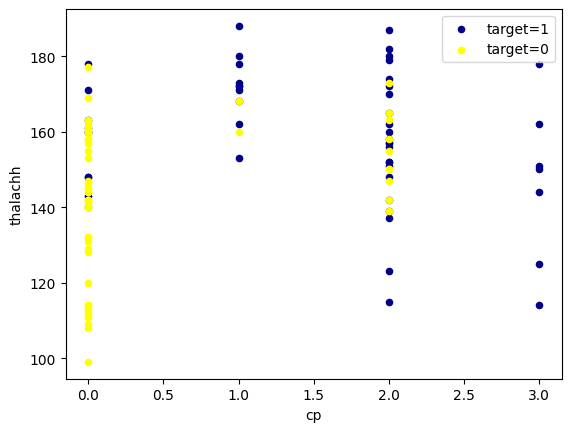

In [3]:
ax = df[df['output'] == 1][0:50].plot(kind='scatter', x='cp', y='thalachh', color='DarkBlue', label='target=1');
df[df['output'] == 0][0:50].plot(kind='scatter', x='cp', y='thalachh', color='Yellow', label='target=0', ax=ax);
plt.show()

# Preprocessiong and selection

In [4]:
cdf = df[['age', 'sex', 'cp', 'chol', 'restecg', 'exng','thall', 'caa', 'output']]
cdf.head()

,age,sex,cp,chol,restecg,exng,thall,caa,output
0,63,1,3,233,0,0,1,0,1
1,37,1,2,250,1,0,2,0,1
2,41,0,1,204,0,0,2,0,1
3,56,1,1,236,1,0,2,0,1
4,57,0,0,354,1,1,2,0,1


In [5]:
X = cdf.drop('output', axis=1)
y = cdf['output']

# Transform to array

In [6]:
X = np.array(X)
y = np.array(y)

# Normalize

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train / Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(272, 8) (272,)
(31, 8) (31,)


# SVM

In [9]:
from sklearn import svm
model = svm.SVC(kernel='poly')
model.fit(x_train, y_train)

SVC(kernel='poly')

# Predict test data

In [10]:
yhat = model.predict(x_test)

# Evaluation

In [11]:
from sklearn.metrics import jaccard_score , classification_report, confusion_matrix
import itertools

### Jaccard score

In [12]:
jaccard_score(y_test, yhat, pos_label=1)

0.9411764705882353

### Classification_report

In [13]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        16

    accuracy                           0.97        31
   macro avg       0.97      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



### Confusion_matrix

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[16  0]
 [ 1 14]]


Confusion matrix, without normalization
[[16  0]
 [ 1 14]]


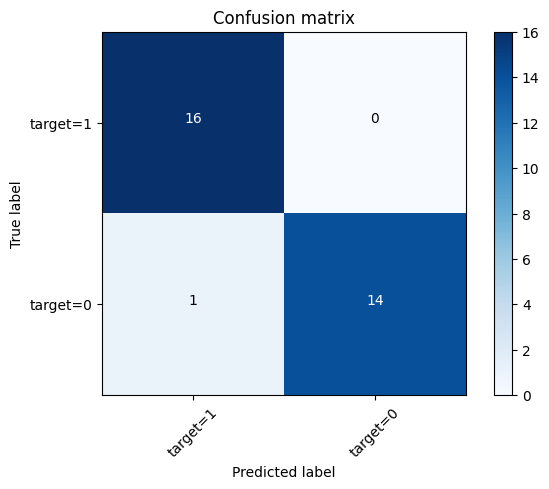

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')